In [1]:
#Importing necessary modules
import numpy as np
import numpy.linalg as la
np.set_printoptions(suppress=True)

In [2]:
#Creating the Page Rank Function
def pageRank(linkMatrix, d) : #d is the damping factor
    n = linkMatrix.shape[0]
    M = (d * linkMatrix) + ((1-d)/n * np.ones([n, n]))
    
    r = 100 * np.ones(n) / n
    for i in np.arange(100):
        r = M @ r    
        
    return r

In [3]:
#Method to create a random probabilistic connection of nodes
def generate_internet(N):
    x = np.random.randint(10, size=(N,N)).astype('uint8')
    
    x = np.around(x/x.sum(axis=0),3)
    return x

In [4]:
#Generating a 5x5 internet connection with no damping
internet = generate_internet(50)
internet

array([[0.013, 0.009, 0.038, ..., 0.032, 0.009, 0.   ],
       [0.025, 0.005, 0.005, ..., 0.014, 0.009, 0.005],
       [0.038, 0.028, 0.038, ..., 0.037, 0.032, 0.045],
       ...,
       [0.034, 0.042, 0.   , ..., 0.014, 0.041, 0.015],
       [0.008, 0.037, 0.029, ..., 0.   , 0.014, 0.025],
       [0.013, 0.019, 0.024, ..., 0.023, 0.041, 0.   ]])

In [5]:
#Applying the page rank algorithm to find the probability of each page
pageRank(internet, 1)

array([1.92192031, 1.78861631, 2.0446603 , 2.19105247, 1.58949986,
       2.34337093, 1.8977373 , 2.08911983, 2.10592607, 2.29823408,
       2.04386869, 1.96014374, 1.79212513, 2.00162781, 1.93643508,
       2.02672193, 1.86804991, 2.08639392, 2.03286126, 2.24737441,
       1.86227312, 2.12272459, 1.85008736, 1.8984291 , 2.5017005 ,
       2.08830267, 2.10249585, 2.14060284, 2.00643547, 1.70940253,
       1.93333268, 1.97080937, 2.22722161, 2.15865093, 1.89906307,
       2.48019421, 1.84601785, 2.09651468, 2.32587423, 2.23871809,
       2.1604124 , 1.88073951, 1.99646963, 2.00861449, 2.14331867,
       1.97580472, 1.90707643, 2.42540595, 2.12528575, 1.82817948])

In [6]:
#Computing Eigenvalues for the Computed Page Rank Matrix
eVals, eVecs = la.eig(internet) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([1.88099186, 1.75052665, 2.00111803, 2.14439269, 1.55565051,
       2.29346743, 1.85732385, 2.04463077, 2.06107911, 2.2492918 ,
       2.00034328, 1.9184013 , 1.75396075, 1.95900195, 1.89519753,
       1.98356166, 1.82826867, 2.0419629 , 1.98957025, 2.19951522,
       1.82261489, 2.07751989, 1.81068864, 1.85800091, 2.44842529,
       2.04383101, 2.05772194, 2.09501742, 1.96370722, 1.67299977,
       1.8921612 , 1.9288398 , 2.17979158, 2.11268116, 1.85862138,
       2.42737698, 1.80670579, 2.05186814, 2.27634334, 2.19104325,
       2.11440512, 1.84068803, 1.95395361, 1.96583984, 2.09767541,
       1.93372877, 1.8664641 , 2.37375547, 2.08002651, 1.7892473 ])

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


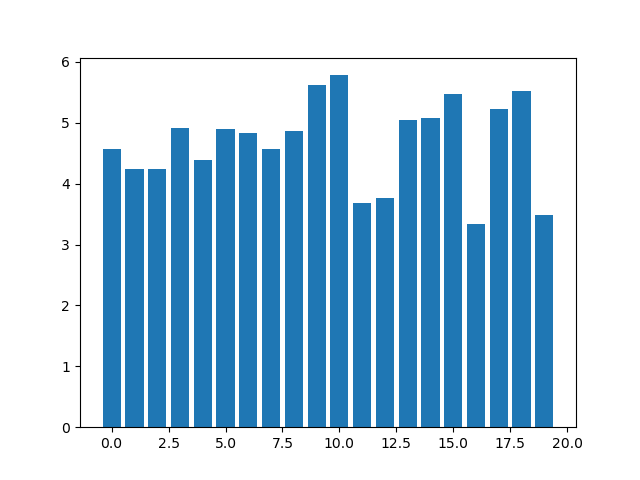

In [8]:
#Plotting the yielded values to visualize the Page Rank generated for internet of 50 connections
%pylab notebook
r = pageRank(generate_internet(20), 0.9)
plt.bar(arange(r.shape[0]), r);